# WARG COMPUTER VISION BOOTCAMP
## CLASSIFY IMAGES WITH MANUAL CNN

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

2022-03-21 14:05:16.304444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 14:05:16.304489: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load Data

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Set up model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(3, 5),
    # tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

2022-03-21 14:05:23.005671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-03-21 14:05:23.005757: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eugen): /proc/driver/nvidia/version does not exist
2022-03-21 14:05:23.006265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define loss function

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### Compile Model

In [6]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)
# model.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [7]:
training_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2022-03-21 14:05:25.865111: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 27s 16ms/step - loss: 1.8156 - accuracy: 0.3491 - val_loss: 1.6222 - val_accuracy: 0.4232
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5943 - accuracy: 0.4337 - val_loss: 1.5005 - val_accuracy: 0.4694
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5054 - accuracy: 0.4649 - val_loss: 1.4555 - val_accuracy: 0.4818
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4421 - accuracy: 0.4860 - val_loss: 1.4582 - val_accuracy: 0.4776
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3993 - accuracy: 0.5002 - val_loss: 1.4352 - val_accuracy: 0.4924
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3644 - accuracy: 0.5127 - val_loss: 1.3990 - val_accuracy: 0.5026
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3339 - accuracy: 0.5197 - val_loss: 1.4082 - val_accuracy

### Validate

In [8]:
validation_history = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.4585 - accuracy: 0.4953 - 883ms/epoch - 3ms/step


### Visualize

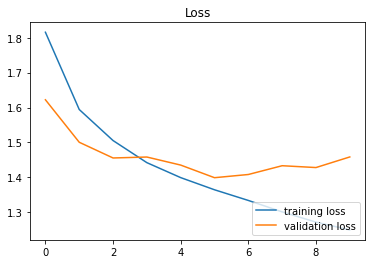

In [11]:
fig = plt.figure()
plt.plot(range(10), training_history.history['loss'], label="training loss")
plt.plot(range(10), training_history.history['val_loss'], label="validation loss")
plt.legend(loc='lower right')
plt.title("Loss")
plt.savefig('training_loss.jpg')